In [493]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entailment Bank

is a project to enable machines to answer a question with line of reasoning. The data has hypothesis $H$ as its roots, $int$ as intermediate reasoning, and $sent$ as where the sentence containing answers / facts.

In this notebook I will shortly introduce on how to load data and visualize the line of reasoning tree. 

In [494]:
from lib.parser import parse_lisp
from lib.vis import draw_lisp_tree

let's try to visualize complex line of reasoning sample

In [504]:
sample_lisp_proof = """
((((((((((sent1 sent4 sent8) -> int1) sent6) -> int2) sent5) -> int3) ((((((sent1 sent4 sent8) -> int1) sent6) -> int2) sent3 sent7) -> int4)) -> int5) sent2) -> int6)
"""

In [505]:
root = parse_lisp(sample_lisp_proof)

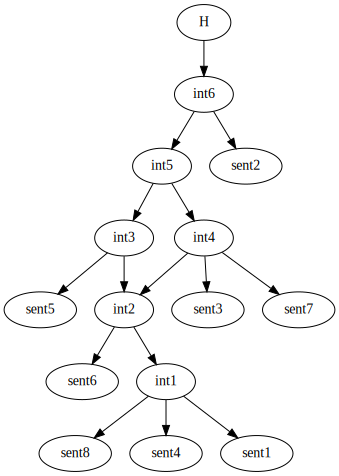

In [506]:
draw_lisp_tree(root)

## Data format

Entailment bank datasets are stored in json line format, and could be loaded into memory with this code

In [498]:
import json

dev_data = []
with open("data/dev.jsonl", "r") as f:
    for line in f:
        dev_data.append(json.loads(line))

for each json line, it has `meta` that will contain

|attribute name|short description|
|--------------|-----------------|
|question_text|The question asked|
|answer_text|The correct answer|
|hypothesis_id||
|triples| sentence id with sentence text key values|
|distractors| distractor sentences|
|distractors_relevance| distractor relevances|
|core_concepts| |
|step_proof| |
|lisp_proof| line of reasonin in form of tree|
|polish_proof| |
|add_list||
|delete_list||

in this notebook I will only focus on `lisp_proof` attribute and give sample visualization using my own parser.

((((((sent2 sent3) -> int1) sent4) -> int2) sent1) -> int3)


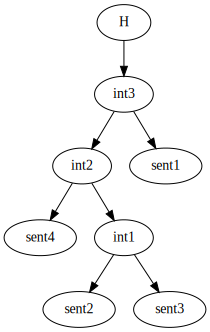

In [501]:
random.seed(32)

random_idx = random.randint(0, len(dev_data))
lisp_proof = dev_data[random_idx]["meta"]["lisp_proof"]
root = parse_lisp(lisp_proof)
print(lisp_proof)
draw_lisp_tree(root)

((((sent1 sent4) -> int1) ((sent2 sent3) -> int2)) -> int3)


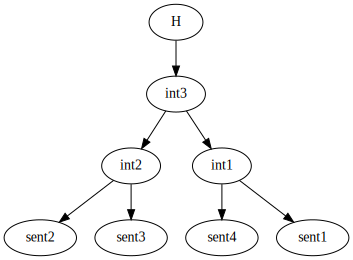

In [502]:
random.seed(100)


random_idx = random.randint(0, len(dev_data))
lisp_proof = dev_data[random_idx]["meta"]["lisp_proof"]
root = parse_lisp(lisp_proof)
print(lisp_proof)
draw_lisp_tree(root)

((((sent3 sent4) -> int10) ((((((((((sent6 sent9) -> int1) ((((sent1 sent8) -> int2) sent10) -> int3)) -> int4) sent2) -> int5) sent5) -> int6) ((((sent12 sent7) -> int7) sent11) -> int8)) -> int9)) -> int11)


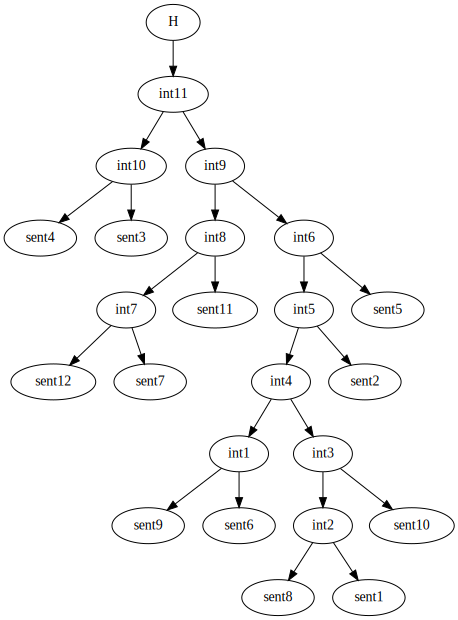

In [503]:
random.seed(934)

random_idx = random.randint(0, len(dev_data))
lisp_proof = dev_data[random_idx]["meta"]["lisp_proof"]
root = parse_lisp(lisp_proof)
print(lisp_proof)
draw_lisp_tree(root)